<a href="https://colab.research.google.com/github/FGalvao77/Modelo-de-classificacao---arvore-de-decisao/blob/main/Modelo_de_classifica%C3%A7%C3%A3o_%C3%A1rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de classificação - árvore de decisão**

---



## **1. Carregando e realizando a leitura dos conjuntos de dados**

In [3]:
# carregando o conjunto de dados de treino
!wget 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'

--2021-11-27 21:14:18--  https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48124 (47K) [text/plain]
Saving to: ‘credtrain.txt.4’

credtrain.txt.4     100%[===================>]  47.00K  --.-KB/s    in 0.008s  

2021-11-27 21:14:18 (5.99 MB/s) - ‘credtrain.txt.4’ saved [48124/48124]



In [1]:
# importando biblioteca para ignorar "erros"
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# importando a biblioteca para modelagem de dados
import pandas as pd

In [4]:
# realizando a leitura do conjunto de dados de treino
train_data = pd.read_csv('/content/credtrain.txt')

# visualizando o conjunto de dados de treino
train_data

,1\t0\t360\t0\t313\t9\t52\t0\t25\t48\t0\t1
0,0\t0\t350\t1\t468\t10\t65\t0\t33\t6\t0\t1
1,0\t0\t1100\t0\t829\t9\t125\t0\t56\t48\t0\t1
2,0\t0\t3000\t0\t552\t12\t76\t1\t31\t60\t0\t1
3,1\t0\t1000\t0\t809\t12\t111\t0\t24\t7\t0\t1
4,0\t0\t300\t0\t331\t6\t74\t1\t41\t0\t0\t1
...,...
1494,1\t0\t500\t0\t437\t12\t60\t0\t60\t48\t0\t1
1495,1\t0\t2057\t0\t301\t1\t318\t0\t35\t48\t0\t1
1496,0\t0\t570\t0\t511\t12\t71\t1\t28\t144\t0\t1
1497,0\t0\t360\t0\t384\t12\t52\t0\t33\t36\t0\t1


> Perceba que a visualização dos dados está "confusa".

Vamos melhorar sua exibição!

In [5]:
# realizando novamente a leitura do conjunto de dados de treino
train_data = pd.read_csv('/content/credtrain.txt', sep='\t')
train_data

,1,0,360,0.1,313,9,52,0.2,25,48,0.3,1.1
0,0,0,350,1,468,10,65,0,33,6,0,1
1,0,0,1100,0,829,9,125,0,56,48,0,1
2,0,0,3000,0,552,12,76,1,31,60,0,1
3,1,0,1000,0,809,12,111,0,24,7,0,1
4,0,0,300,0,331,6,74,1,41,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,1,0,500,0,437,12,60,0,60,48,0,1
1495,1,0,2057,0,301,1,318,0,35,48,0,1
1496,0,0,570,0,511,12,71,1,28,144,0,1
1497,0,0,360,0,384,12,52,0,33,36,0,1


> Agora conseguimos visualizar cada coluna do conjunto de dados, pórem não há nome das colunas.

Vamos resolver essa situação!

- iremos instanciar o nome dos atributos (colunas) manualmente e, para novamente carregarmos o conjunto de dados com seu `header` (cabeçalho).

In [6]:
# instanciando o nome das colunas
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

In [7]:
# realizando a leitura do conjunto de dados de treino
train_data = pd.read_csv('/content/credtrain.txt', sep='\t', names=headers)

# visualizando as 5 primeiras linhas do conjunto de dados de treino
train_data.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [8]:
# carregando o conjunto de dados de teste
!wget 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'

--2021-11-27 21:14:18--  https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2021-11-27 21:14:21 ERROR 500: Internal Server Error.



In [9]:
# realizando a leitura do conjunto de dados de teste
test_data = pd.read_csv('/content/credtest.txt', sep='\t', names=headers)

# visualizando as 5 primeiras linhas do conjunto de dados de teste
test_data.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


## **2. Análise exploratória dos conjuntos de dados**

In [10]:
# visualizando a dimensão dos conjunto de dados - treino e teste
train_data.shape, test_data.shape

((1500, 12), (577, 12))

In [11]:
# informações gerais do conjunto de dados de treino
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ESCT     1500 non-null   int64
 1   NDEP     1500 non-null   int64
 2   RENDA    1500 non-null   int64
 3   TIPOR    1500 non-null   int64
 4   VBEM     1500 non-null   int64
 5   NPARC    1500 non-null   int64
 6   VPARC    1500 non-null   int64
 7   TEL      1500 non-null   int64
 8   IDADE    1500 non-null   int64
 9   RESMS    1500 non-null   int64
 10  ENTRADA  1500 non-null   int64
 11  CLASSE   1500 non-null   int64
dtypes: int64(12)
memory usage: 140.8 KB


In [12]:
# informações gerais do conjunto de dados de teste
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ESCT     577 non-null    int64
 1   NDEP     577 non-null    int64
 2   RENDA    577 non-null    int64
 3   TIPOR    577 non-null    int64
 4   VBEM     577 non-null    int64
 5   NPARC    577 non-null    int64
 6   VPARC    577 non-null    int64
 7   TEL      577 non-null    int64
 8   IDADE    577 non-null    int64
 9   RESMS    577 non-null    int64
 10  ENTRADA  577 non-null    int64
 11  CLASSE   577 non-null    int64
dtypes: int64(12)
memory usage: 54.2 KB


In [13]:
# estatística descritiva do conjunto de dados de treino
train_data.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [14]:
# estatística descritiva do conjunto de dados de teste
test_data.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.547660,0.110919,930.623917,0.452340,568.377816,8.402080,103.755633,0.112652,41.188908,29.270364,26.528596,0.469671
std,0.710706,0.511841,876.614452,0.498155,352.600280,3.633065,67.692428,0.316441,13.477631,50.100313,90.786052,0.499512
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,475.000000,0.000000,399.000000,6.000000,66.000000,0.000000,30.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,600.000000,0.000000,489.000000,10.000000,85.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1000.000000,1.000000,623.000000,10.000000,117.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,5.000000,9675.000000,1.000000,6000.000000,21.000000,719.000000,1.000000,70.000000,360.000000,1150.000000,1.000000


In [47]:
train_data['CLASSE'].value_counts(normalize=True)

0    0.523333
1    0.476667
Name: CLASSE, dtype: float64

## **3. Pré-poocessamento dos dados**

In [15]:
# importando a biblioteca para modelagem numérica
import numpy as np

In [16]:
# # transformação dos atributos e da classe alvo em matrizes
# X_train_ = np.array(data_train.iloc[:, 0:11])
# y_train_ = np.array(data_train['CLASSE'])

# # transformação dos atributos e da classe alvo em matrizes
# X_test = np.array(data_test.iloc[:, 0:11])
# y_test = np.array(data_test['CLASSE'])

In [17]:
# df_train = np.array(train_data)

In [18]:
# df_test = np.array(test_data)

In [19]:
# df_train

In [20]:
# separando as variáveis explicativas (X) e a resposta (y) do conjunto de dados de treino
X = train_data.iloc[:, 0:11]
y = train_data['CLASSE']

In [21]:
# visualizando o objeto criado "X"
X

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA
0,1,0,360,0,313,9,52,0,25,48,0
1,0,0,350,1,468,10,65,0,33,6,0
2,0,0,1100,0,829,9,125,0,56,48,0
3,0,0,3000,0,552,12,76,1,31,60,0
4,1,0,1000,0,809,12,111,0,24,7,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,1,0,500,0,437,12,60,0,60,48,0
1496,1,0,2057,0,301,1,318,0,35,48,0
1497,0,0,570,0,511,12,71,1,28,144,0
1498,0,0,360,0,384,12,52,0,33,36,0


In [22]:
# visualizando o objeto criado "y"
y

0       1
1       1
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Name: CLASSE, Length: 1500, dtype: int64

In [23]:
# importando a biblioteca para particionamento dos dados
from sklearn.model_selection import train_test_split

In [24]:
# aplicando a divisão dos dados em treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=31)

In [25]:
# visualizando as 5 primeiras linhas dos conjuntos de dados e, a partição dos dados de treino
print(train_data.head(),
      test_data.head(),
      X_train,
      y_train,
      sep='\n\n')

   ESCT  NDEP  RENDA  TIPOR  VBEM  ...  TEL  IDADE  RESMS  ENTRADA  CLASSE
0     1     0    360      0   313  ...    0     25     48        0       1
1     0     0    350      1   468  ...    0     33      6        0       1
2     0     0   1100      0   829  ...    0     56     48        0       1
3     0     0   3000      0   552  ...    1     31     60        0       1
4     1     0   1000      0   809  ...    0     24      7        0       1

[5 rows x 12 columns]

   ESCT  NDEP  RENDA  TIPOR  VBEM  ...  TEL  IDADE  RESMS  ENTRADA  CLASSE
0     0     2    500      1   618  ...    0     36      6        0       0
1     1     0    813      0   552  ...    0     43     48      119       1
2     3     0    350      0   488  ...    0     43      0        0       1
3     1     0   1530      0   381  ...    0     28     48        0       1
4     0     0    688      1   396  ...    0     49     72        0       1

[5 rows x 12 columns]

      ESCT  NDEP  RENDA  TIPOR  VBEM  NPARC  VPARC  

## **4. Instanciando e treinando o modelo**

In [26]:
# importando a biblioteca para modelo de árvore de classificação
from sklearn.tree import DecisionTreeClassifier

In [27]:
# instanciando o modelo
model = DecisionTreeClassifier(max_depth=3, random_state=31)

In [28]:
# visualizando o modelo
model

DecisionTreeClassifier(max_depth=3, random_state=31)

In [29]:
# treinando o modelo com os dados de treino (X_train e y_train)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=31)

### **4.1. Visualizano a árvore criada pelo modelo**

In [30]:
# importando as bibliotecas para geração gráfica da árvore de decisão
import os
from graphviz import Source
from sklearn.tree import export_graphviz

In [31]:
# instanciando o objeto da árvore de decisão
export_graphviz(model, out_file='credit_tree.dot',
                feature_names=headers[0:11],
                rounded=True,
                filled=True)

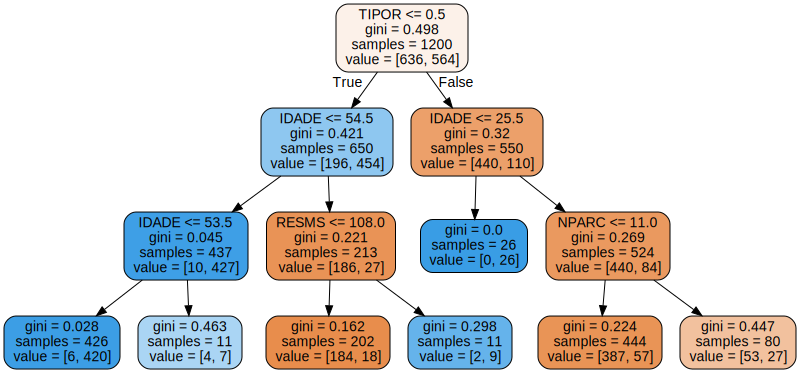

In [32]:
# visualizando a árvore de decisão criada pelo modelo
Source.from_file('credit_tree.dot')

In [33]:
# visualizando as 10 primeiras linhas dos dados de validação (X_val)
X_val[:10]

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA
1221,0,0,300,1,629,12,55,1,54,60,230
987,1,0,600,1,540,12,73,0,28,6,0
190,0,0,317,1,459,12,63,1,57,264,0
660,0,0,800,0,399,3,149,1,57,0,0
472,1,0,3000,0,360,1,376,0,43,48,0


In [34]:
# realizando as predições com o modelo nos dados de validação (X_val)
y_pred_val = model.predict(X_val)

In [35]:
# visualizando as predições
y_pred_val

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

## **5. Avaliando o modelo**

In [36]:
# importando as bibliotecas para gerar o relatório de classificação e matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
# visualizando a matriz de confusão com as predições realizadas (y_pred_val) e os dados de validação (y_val)
confusion_matrix(y_pred_val, y_val)

array([[146,  26],
       [  3, 125]])

In [38]:
# importando as biblioetcas para visualização gráfica
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### **5.1. Visualizando o relatório de classificação e a matriz de confusão**

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       172
           1       0.83      0.98      0.90       128

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.90      0.90       300



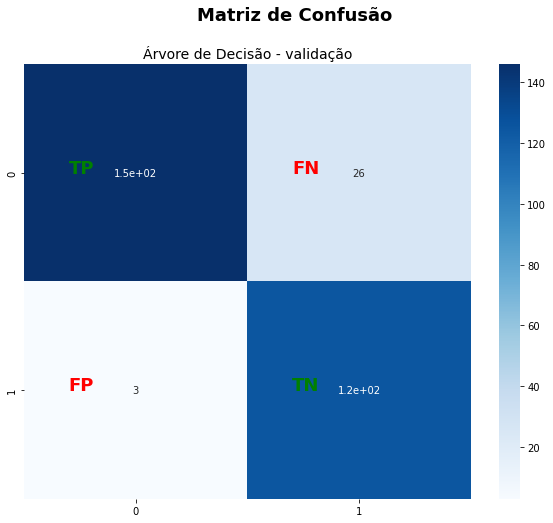

In [39]:
# imprimindo o relatório de classificação dos dados de validação do modelo
print(classification_report(y_pred_val, y_val))

# visualizando graficamente a matriz de confusão dos dados de validação do modelo
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Matriz de Confusão', fontsize=18, fontweight='bold')

sns.heatmap(confusion_matrix(y_pred_val, y_val), cmap='Blues', annot=True)
plt.title('Árvore de Decisão - validação', fontsize=14)
plt.xticks()
plt.yticks()

plt.annotate('TP', (0.2,0.5), fontsize=18, fontweight='bold', color='green')
plt.annotate('FN', (1.2,0.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('FP', (0.2,1.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('TN', (1.2,1.5), fontsize=18, fontweight='bold', color='green')

plt.show();

**Aplicando um segundo modelo**

Iremos aumentar a profundidade da árvore, `max_depth=5` e aplicar o método `class_weight='balanced'` para balancear as instâncias presentes na varíavel alvo.


In [61]:
# instanciando o segundo modelo
model2 = DecisionTreeClassifier(max_depth=5, random_state=31, class_weight='balanced')
model2

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=31)

In [62]:
# treinando o modelo com os dados de treino (X_train e y_train)
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=31)

In [63]:
# realizando as predições com o segundo modelo nos dados de validação (X_val)
y_pred_val2 = model2.predict(X_val)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       167
           1       0.83      0.95      0.89       133

    accuracy                           0.89       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300



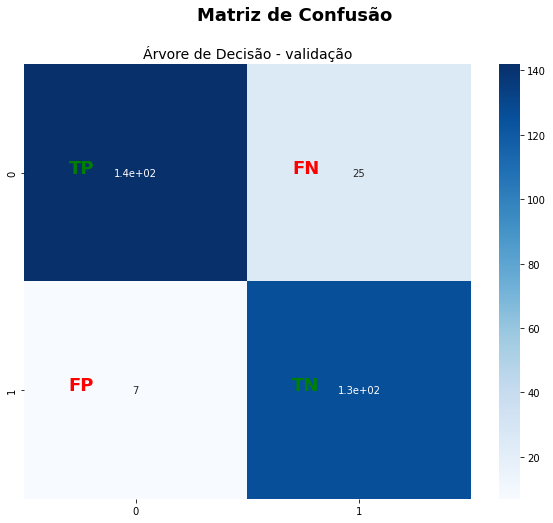

In [64]:
# imprimindo o relatório de classificação dos dados de validação do segundo modelo
print(classification_report(y_pred_val2, y_val))

# visualizando graficamente a matriz de confusão dos dados de validação do segundo modelo
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Matriz de Confusão', fontsize=18, fontweight='bold')

sns.heatmap(confusion_matrix(y_pred_val2, y_val), cmap='Blues', annot=True)
plt.title('Árvore de Decisão - validação', fontsize=14)
plt.xticks()
plt.yticks()

plt.annotate('TP', (0.2,0.5), fontsize=18, fontweight='bold', color='green')
plt.annotate('FN', (1.2,0.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('FP', (0.2,1.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('TN', (1.2,1.5), fontsize=18, fontweight='bold', color='green')

plt.show();

## **6. Aplicando e avaliando o modelo com os dados de teste**

In [40]:
# instanciando as variáveis explicativas e a resposta do conjunto de dados de teste (test_data)
X_test = np.array(test_data.iloc[:, 0:11])
y_test = np.array(test_data['CLASSE'])

In [41]:
# realizando novas predições com o modelo com os dados "X_test"
new_pred = model.predict(X_test)

In [42]:
# visualizando as 10 primeiras predições
new_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [43]:
# visualizando a dimensão dos conjuntos de dados
print(X_train.shape,
      X_val.shape,
      X_test.shape,
      sep='\n')

(1200, 11)
(300, 11)
(577, 11)


              precision    recall  f1-score   support

           0       0.99      0.85      0.92       354
           1       0.81      0.98      0.89       223

    accuracy                           0.90       577
   macro avg       0.90      0.92      0.90       577
weighted avg       0.92      0.90      0.90       577



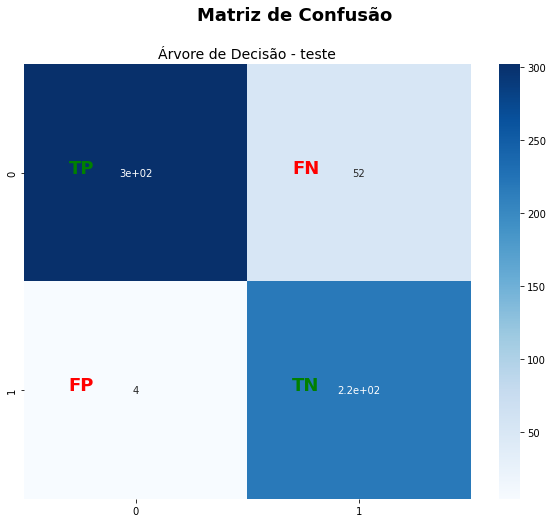

In [44]:
# imprimindo o relatório de classificação dos dados de teste do modelo
print(classification_report(new_pred, y_test))

# visualizando graficamente a matriz de confusão dos dados de teste do modelo
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Matriz de Confusão', fontsize=18, fontweight='bold')

sns.heatmap(confusion_matrix(new_pred, y_test), cmap='Blues', annot=True)
plt.title('Árvore de Decisão - teste', fontsize=14)
plt.xticks()
plt.yticks()

plt.annotate('TP', (0.2,0.5), fontsize=18, fontweight='bold', color='green')
plt.annotate('FN', (1.2,0.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('FP', (0.2,1.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('TN', (1.2,1.5), fontsize=18, fontweight='bold', color='green')

plt.show()

## **7.Referências**

- Bezerra, Eduardo (2016) Introdução à Aprendizagem Profunda. Disponível em: 
 - https://www.researchgate.net/publication/309321510_Introducao_a_Aprendizagem_Profunda, julho de 2020.

- Géron, Aurélien (2019). Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

- Grus, Joel (2016). Data Science do Zero: Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

- Han, Jiawei. Kamber, Micheline. Pei, Jian (2012) Data Mining: Concepts and techniques. Morgan Kaufmann, 3rd Edition.

- McKinney, Wes (2018). Python para Análise de Dados: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

### **7.1. Leitura complementar e tutoriais:**

- [Playlist Mineração de Dados (Prof. Eduardo Ogasawara - Mestrado PPCIC)](https://www.youtube.com/playlist?list=PLTy3TWJeueGw1eeP1cvaIiTzJrIljcVAq)
- [Variáveis dummies](https://www.delftstack.com/pt/howto/python-pandas/get-dummies-pandas/)
- [Documentação do método pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
- [Cálculo da curva de aprendizagem](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)
- [Definição da estratégia de separação dos conjuntos de treino e validação no cálculo da curva de aprendizagem](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit)